Yelp Reviews

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
import csv
import pandas as pd

#This code generates a TSV using the Yelp review data from Gdrive
outfile = open("review_stars.tsv", 'w')
sfile = csv.writer(outfile, delimiter ="\t", quoting=csv.QUOTE_MINIMAL)
sfile.writerow(['business_id', 'stars', 'text'])

with open('/content/drive/MyDrive/Colab Notebooks/yelp_academic_dataset_review.json', encoding="utf-8") as f:
    for line in f:
        row = json.loads(line)
        # some special char must be encoded in 'utf-8'
        sfile.writerow([row['business_id'], row['stars'], (row['text']).encode('utf-8')])
        
outfile.close()

Reads the review JSON file 

In [ ]:
#This code loads the data from the generated TSV
df_review= pd.read_csv('review_stars.tsv', delimiter ="\t", encoding="utf-8")
df_review

,business_id,stars,text
0,buF9druCkbuXLX526sGELQ,4.0,"b""Apparently Prides Osteria had a rough summer..."
1,RA4V8pr014UyUbDvI-LW2A,4.0,b'This store is pretty good. Not as great as W...
2,_sS2LBIGNT5NQb6PD1Vtjw,5.0,"b""I called WVM on the recommendation of a coup..."
3,0AzLzHfOJgL7ROwhdww2ew,2.0,"b""I've stayed at many Marriott and Renaissance..."
4,8zehGz9jnxPqXtOc7KaJxA,4.0,"b""The food is always great here. The service f..."
...,...,...,...
8635398,yyTtwwQ4JnQMJ2rn3W0S0g,1.0,"b'In December, I called in (as a returning cus..."
8635399,RDgwjgbu5xziFIAaNn3WCQ,1.0,b'This guy is a moron that will stalk and hara...
8635400,rbuj2X4SXIc3MDul4dcxIA,5.0,"b'Yummy, great chew on the bagel\nFriendly sta..."
8635401,IRzjEZ2pX4iOpnBG7oZJ7g,2.0,"b""This used to be my car wash of choice. They ..."


Reads the business JSON file

In [ ]:
# import json
# import csv
# import pandas as pd

#This code Imports the Yelp business data from Gdrive
df_business = pd.read_json('/content/drive/MyDrive/Colab Notebooks/yelp_academic_dataset_business.json', encoding="utf-8", lines=True)
df_business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160580,D2mHoIDXx9N8mS1pGoKV9Q,Eleven Oaks Realty,,Austin,TX,78701,30.272921,-97.744386,4.0,8,1,None,"Real Estate, Real Estate Services, Home Servic...","{'Monday': '9:0-19:0', 'Tuesday': '9:0-19:0', ..."
160581,bQX-kwVTyZgcdZGEPzce6Q,Webb's Honey,21777 State Rd 520,Orlando,FL,32833,28.499836,-81.047478,4.5,18,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Health Markets, Food, Specialty Food, Grocery","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
160582,wvFZ06nmPmQ2-IVoPqVYLA,Painting with a Twist,2164 S Chickasaw Trl,Orlando,FL,32825,28.511615,-81.270020,5.0,8,0,"{'DogsAllowed': 'False', 'ByAppointmentOnly': ...","Arts & Entertainment, Paint & Sip, Art Classes...","{'Monday': '0:0-0:0', 'Wednesday': '12:0-17:0'..."
160583,GB75wPibj3IjNauaoCxyGA,Havana Cafe,910 NW 14th St,Portland,OR,97209,45.529647,-122.685153,4.0,10,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Cuban, Sandwiches, Restaurants, Cafes",None


filters out the businesses that have at least 20 or more reviews

In [ ]:
#This Code removes all businesses with less that 20 reviews
df_business_greater20 = df_business[(df_business['review_count'] >= 20)]
df_business_greater20

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
5,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'..."
8,N3_Gs3DnX4k9SgpwJxdEfw,Lane Wells Jewelry Repair,"7801 N Lamar Blvd, Ste A140",Austin,TX,78752,30.346169,-97.711458,5.0,30,1,"{'RestaurantsPriceRange2': '1', 'ByAppointment...","Shopping, Jewelry Repair, Appraisal Services, ...","{'Monday': '12:15-17:0', 'Tuesday': '12:15-17:..."
12,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,474 Lowell St,Peabody,MA,01960,42.541155,-70.973438,4.0,39,1,"{'RestaurantsGoodForGroups': 'True', 'HasTV': ...","Food, Pizza, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160573,Zl6SUy6x9jqjRu2HbtEO6A,Split Dine and Drink,7335 SW Bridgeport Rd,Tigard,OR,97224,45.394457,-122.752535,2.0,48,0,"{'RestaurantsDelivery': 'False', 'GoodForKids'...","American (Traditional), Desserts, American (Ne...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
160574,Q78fYV6B6P6GmX07YVgi4g,Maudie’s Hill Country,12506 Shops Pkwy,Bee Cave,TX,78738,30.304761,-97.937394,3.0,310,1,"{'BusinessParking': '{'garage': False, 'street...","Mexican, Bars, Nightlife, Tex-Mex, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '9:0-21:0', '..."
160575,uXdQkuEtvLAzfc3MsO-sTQ,Mama's Cocina Latina,1958 Piedmont Rd NE,Atlanta,GA,30324,33.810996,-84.367084,3.0,185,1,"{'WiFi': 'u'no'', 'BusinessAcceptsCreditCards'...","Restaurants, Mexican, Latin American","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
160576,G8hSRqOEAC0qIJdghONUWQ,Nissan North,8645 N High St,Worthington,OH,43085,40.140382,-83.018179,4.0,26,1,{'BusinessAcceptsCreditCards': 'True'},"Automotive, Car Dealers","{'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ..."


Joins the review and business data frames together


In [ ]:
#This code groups the databy Business
df_review_agg = df_review.groupby('business_id')['text'].sum()  
df_ready_for_sklearn = pd.DataFrame({'business_id': df_review_agg.index, 'all_reviews': df_review_agg.values})
df_ready_for_sklearn

,business_id,all_reviews
0,--0DF12EMHYI8XIgoFha6A,"b""Being from Chicago originally and moving thi..."
1,--0r8K_AQ4FZfLsX3ZYRDA,b'Quick and reasonably priced service. Dropped...
2,--0zrn43LEaB4jUWTQH_Bg,b'-Rude staff and management. \n-They do not v...
3,--164t1nclzzmca7eDiJMw,b'Banh mi was pretty weak.'b'Incredibly good f...
4,--2aF9NhXnNVpDV0KS3xBQ,"b'I recently moved to Delaney Park, and Spence..."
...,...,...
160580,zzpmoTVq4yn86U7ArHyFBQ,b'This is another great place to enjoy a bit t...
160581,zzqq8J7Pibxod1YcknlkWA,"b'Restyle is a true find, for the Lakeway Area..."
160582,zzwK-TJsCJX5wZrdtKemPg,"b""I agree with one of the other members - if I..."
160583,zzxIO4bjWCQrvCJ0O5mmvA,b'Tropical plumbing is very helpful! We were i...


In [ ]:
# import json
# import csv
# import pandas as pd

#This code is to save data to drive
#df_ready_for_sklearn = pd.read_csv('/content/ready_for_sklearn.tsv', index_col=0)
#df_ready_for_sklearn.to_csv('ready_for_sklearn.csv')

In [ ]:
#this code joins the review and business data frames
df_join = pd.merge(df_business_greater20, df_ready_for_sklearn, on='business_id')
df_join

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,all_reviews
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...","b""Stopped in on a busy Friday night. Despite t..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...","b""Elephant's contacted me the same day I poste..."
2,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...",b'Decent food at reasonable prices. Ambiance i...
3,N3_Gs3DnX4k9SgpwJxdEfw,Lane Wells Jewelry Repair,"7801 N Lamar Blvd, Ste A140",Austin,TX,78752,30.346169,-97.711458,5.0,30,1,"{'RestaurantsPriceRange2': '1', 'ByAppointment...","Shopping, Jewelry Repair, Appraisal Services, ...","{'Monday': '12:15-17:0', 'Tuesday': '12:15-17:...","b""I stopped in here today to inquire about fix..."
4,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,474 Lowell St,Peabody,MA,01960,42.541155,-70.973438,4.0,39,1,"{'RestaurantsGoodForGroups': 'True', 'HasTV': ...","Food, Pizza, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",b'Pizza here is delicious. I tried it once a f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73026,Zl6SUy6x9jqjRu2HbtEO6A,Split Dine and Drink,7335 SW Bridgeport Rd,Tigard,OR,97224,45.394457,-122.752535,2.0,48,0,"{'RestaurantsDelivery': 'False', 'GoodForKids'...","American (Traditional), Desserts, American (Ne...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...","b""Is this really the same place that the prior..."
73027,Q78fYV6B6P6GmX07YVgi4g,Maudie’s Hill Country,12506 Shops Pkwy,Bee Cave,TX,78738,30.304761,-97.937394,3.0,310,1,"{'BusinessParking': '{'garage': False, 'street...","Mexican, Bars, Nightlife, Tex-Mex, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '9:0-21:0', '...",b'Went with a female friend tonight. The place...
73028,uXdQkuEtvLAzfc3MsO-sTQ,Mama's Cocina Latina,1958 Piedmont Rd NE,Atlanta,GA,30324,33.810996,-84.367084,3.0,185,1,"{'WiFi': 'u'no'', 'BusinessAcceptsCreditCards'...","Restaurants, Mexican, Latin American","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...","b""Best plantains I have had in ages !!! Cooked..."
73029,G8hSRqOEAC0qIJdghONUWQ,Nissan North,8645 N High St,Worthington,OH,43085,40.140382,-83.018179,4.0,26,1,{'BusinessAcceptsCreditCards': 'True'},"Automotive, Car Dealers","{'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...",b'Buyer Beware!!!!! I fell in love with ...


In [ ]:
import sklearn.feature_extraction.text as sk_text

vectorizer = sk_text.TfidfVectorizer(stop_words='english',
                             max_features = 100,
                             min_df=5, 
                             #max_df=5
                             )

#min_df: ignore terms that have a document frequency < min_df.
#max_df: ignore terms that have a document frequency > max_df


matrix = vectorizer.fit_transform(df_join.all_reviews)

tfidf_data = matrix.toarray()     #  convert it to numpy array

print(tfidf_data)
print(tfidf_data.shape)
print(vectorizer.get_feature_names())

Tf_data = pd.DataFrame()

print(len(vectorizer.get_feature_names()))


[[0.04194479 0.05582467 0.05461472 ... 0.01919841 0.0200949  0.02174103]
 [0.01333602 0.03993528 0.0217054  ... 0.06103982 0.01277803 0.04147434]
 [0.01903816 0.03088075 0.01859165 ... 0.05010488 0.0045604  0.02713688]
 ...
 [0.02611182 0.03764847 0.03399921 ... 0.0663975  0.01667952 0.02406117]
 [0.         0.02453326 0.04800306 ... 0.11249496 0.21194647 0.        ]
 [0.0058602  0.05849536 0.05150478 ... 0.05900949 0.005615   0.03644982]]
(73031, 100)
['10', 'amazing', 'area', 'asked', 'awesome', 'bad', 'bar', 'best', 'better', 'bit', 'came', 'cheese', 'chicken', 'coffee', 'come', 'customer', 'day', 'definitely', 'delicious', 'did', 'didn', 'dinner', 'don', 'drinks', 'eat', 'excellent', 'experience', 'favorite', 'feel', 'food', 'fresh', 'friendly', 'going', 'good', 'got', 'great', 'happy', 'home', 'hot', 'just', 'know', 'like', 'little', 'll', 'location', 'long', 'looking', 'lot', 'love', 'lunch', 'make', 'meal', 'menu', 'minutes', 'need', 'new', 'ni', 'nice', 'night', 'nthe', 'order'

In [ ]:
# tfidf_data.to_csv('t.csv')
#made a change here kevin 
pd.DataFrame(tfidf_data).to_csv('t.csv')

In [ ]:
#this Code is to load data from the drive
# import json
# import csv
# import pandas as pd

#df_ready_for_sklearn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ready_for_sklearn.csv', index_col=0)
#df_ready_for_sklearn

In [ ]:
from collections.abc import Sequence
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os


# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)



# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


# Convert all missing values in the specified column to the median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)


# Convert all missing values in the specified column to the default
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)


# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['pred'].tolist(),label='prediction')
    b = plt.plot(t['y'].tolist(),label='expected')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)


# Encode a column to a range between normalized_low and normalized_high.
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) \
               * (normalized_high - normalized_low) + normalized_low

In [ ]:
tfidf_data

array([[0.04194479, 0.05582467, 0.05461472, ..., 0.01919841, 0.0200949 ,
        0.02174103],
       [0.01333602, 0.03993528, 0.0217054 , ..., 0.06103982, 0.01277803,
        0.04147434],
       [0.01903816, 0.03088075, 0.01859165, ..., 0.05010488, 0.0045604 ,
        0.02713688],
       ...,
       [0.02611182, 0.03764847, 0.03399921, ..., 0.0663975 , 0.01667952,
        0.02406117],
       [0.        , 0.02453326, 0.04800306, ..., 0.11249496, 0.21194647,
        0.        ],
       [0.0058602 , 0.05849536, 0.05150478, ..., 0.05900949, 0.005615  ,
        0.03644982]])

0
Epoch 1/1000
1826/1826 - 4s - loss: 0.4150 - val_loss: 0.1399
Epoch 2/1000
1826/1826 - 3s - loss: 0.1326 - val_loss: 0.1250
Epoch 3/1000
1826/1826 - 3s - loss: 0.1214 - val_loss: 0.1190
Epoch 4/1000
1826/1826 - 3s - loss: 0.1162 - val_loss: 0.1193
Epoch 5/1000
1826/1826 - 3s - loss: 0.1133 - val_loss: 0.1133
Epoch 6/1000
1826/1826 - 3s - loss: 0.1117 - val_loss: 0.1291
Epoch 7/1000
1826/1826 - 3s - loss: 0.1100 - val_loss: 0.1145
Epoch 8/1000
1826/1826 - 4s - loss: 0.1088 - val_loss: 0.1144
Epoch 9/1000
1826/1826 - 4s - loss: 0.1074 - val_loss: 0.1112
Epoch 10/1000
1826/1826 - 4s - loss: 0.1070 - val_loss: 0.1089
Epoch 11/1000
1826/1826 - 3s - loss: 0.1064 - val_loss: 0.1103
Epoch 12/1000
1826/1826 - 3s - loss: 0.1054 - val_loss: 0.1080
Epoch 13/1000
1826/1826 - 3s - loss: 0.1048 - val_loss: 0.1080
Epoch 14/1000
1826/1826 - 4s - loss: 0.1045 - val_loss: 0.1162
Epoch 15/1000
1826/1826 - 3s - loss: 0.1036 - val_loss: 0.1078
Epoch 16/1000
1826/1826 - 4s - loss: 0.1034 - val_loss: 0.1213

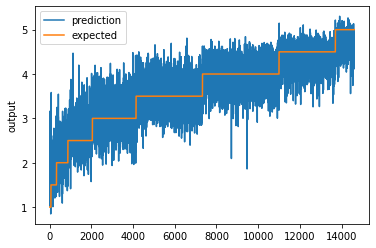

In [ ]:
%matplotlib inline
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

# create feature vector
#missing_median(tfidf_data, 0)

# Encode to a 2D matrix for training
x = tfidf_data
y = df_join[['stars']].to_numpy()

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Define ModelCheckpoint outside the loop
checkpointer = ModelCheckpoint(filepath="dnn/best_weights.hdf5", verbose=0, save_best_only=True) # save best model


# for i in range(1):
for i in range(1):
    print(i)
    
    model = Sequential()
    model.add(Dense(20, input_dim=x.shape[1], activation='relu'))
    model.add(Dense(100, activation='relu'))
    #model.add(Dense(100, activation='relu'))
    # model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

print('Training finished...Loading the best model')  
print()
model.load_weights('dnn/best_weights.hdf5') # load weights from best model

# Predict and measure RMSE
pred = model.predict(x_test)

score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))

# Plot the chart
chart_regression(pred.flatten(),y_test, sort=True)


In [ ]:
df_businesses = df_join.drop(columns=
             ['business_id', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'review_count', 'is_open', 'attributes', 'hours', 'all_reviews'])

df_businesses['predict'] = pred
df_a = df_businesses.drop_duplicates()



df_a[7:22:3]



,name,stars,categories
7,Pittock Mansion,4.5,"Tours, Museums, Architectural Tours, Venues & ..."
10,Blake's On The Park,3.5,"Nightlife, Bars, Gay Bars, Sports Bars"
13,ARGO,4.0,"Food Delivery Services, Food, Restaurants, Med..."
16,Texas Roadhouse,3.5,"Steakhouses, Restaurants, Salad, Barbeque, Ame..."
19,The Daily Stroll,4.0,"Pet Services, Pet Groomers, Pet Stores, Pet Si..."
